In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('cancer_classification.csv')

In [4]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [9]:
X_train = scaler.fit_transform(X_train)

In [10]:
X_test = scaler.transform(X_test)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [13]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

 [==============================] - 0s 10ms/step - loss: 0.0156 - val_loss: 0.2183
Epoch 404/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0165 - val_loss: 0.1901
Epoch 405/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0201 - val_loss: 0.2324
Epoch 406/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0187 - val_loss: 0.2065
Epoch 407/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0156 - val_loss: 0.2164
Epoch 408/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0149 - val_loss: 0.2150
Epoch 409/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0161 - val_loss: 0.2139
Epoch 410/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0180 - val_loss: 0.1919
Epoch 411/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0222 - val_loss: 0.2616
Epoch 412/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0190 - val_loss: 0.1948
Epoch 41

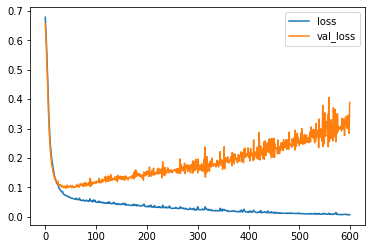

In [14]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [15]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [17]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 17ms/step - loss: 0.6974 - val_loss: 0.6787
Epoch 2/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6758 - val_loss: 0.6582
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6515 - val_loss: 0.6359
Epoch 4/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6267 - val_loss: 0.6090
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5952 - val_loss: 0.5719
Epoch 6/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5537 - val_loss: 0.5242
Epoch 7/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4981 - val_loss: 0.4615
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4397 - val_loss: 0.4016
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3845 - val_loss: 0.3536
Epoch 10/600
14/14 [==============================] - 0s 10ms/step - loss: 0.3376 - val_loss: 0.3103
Epoch

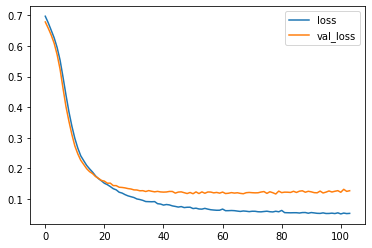

In [18]:
pd.DataFrame(model.history.history).plot()

In [19]:
from tensorflow.keras.layers import Dropout

In [20]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [21]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 17ms/step - loss: 0.6970 - val_loss: 0.6962
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6996 - val_loss: 0.6724
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6856 - val_loss: 0.6477
Epoch 4/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6433 - val_loss: 0.6249
Epoch 5/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6278 - val_loss: 0.6001
Epoch 6/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6030 - val_loss: 0.5734
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5890 - val_loss: 0.5481
Epoch 8/600
14/14 [==============================] - 0s 10ms/step - loss: 0.5675 - val_loss: 0.5141
Epoch 9/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5475 - val_loss: 0.4772
Epoch 10/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5104 - val_loss: 0.4531
Epoch 

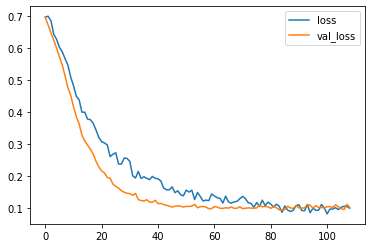

In [22]:
pd.DataFrame(model.history.history).plot()

In [23]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
print(confusion_matrix(y_test, predictions))

[[53  2]
 [ 2 86]]


In [26]:
print(classification_report(y_test, predictions))

precision    recall  f1-score   support

           0       0.96      0.96      0.96        55
           1       0.98      0.98      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

